In [12]:
import subprocess
import shutil
import traceback
import random
import pickle
from os.path import join

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams["image.composite_image"]=False
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from numpy.fft import rfft, irfft, fft, ifft

import psrchive
import residuals

import pipe
from pipe import rotate_phase, convert_template, align_profile, align_scale_profile
import template_match

plt.viridis()

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [9]:
joanna_obs = [
    ("56412.76_GBT_1400", "tuned"),
    ("57900.63_AO_2000", "sband"),
    ("57900.68_AO_3000", "sband"),
    ("56102.39_WSRT_350", "tuned"),
    ("56070.64_AO_430", "tuned"),
    ("56261.84_WSRT_1400", "tuned"),
    ("55998.86_AO_1400", "tuned"),
    ]


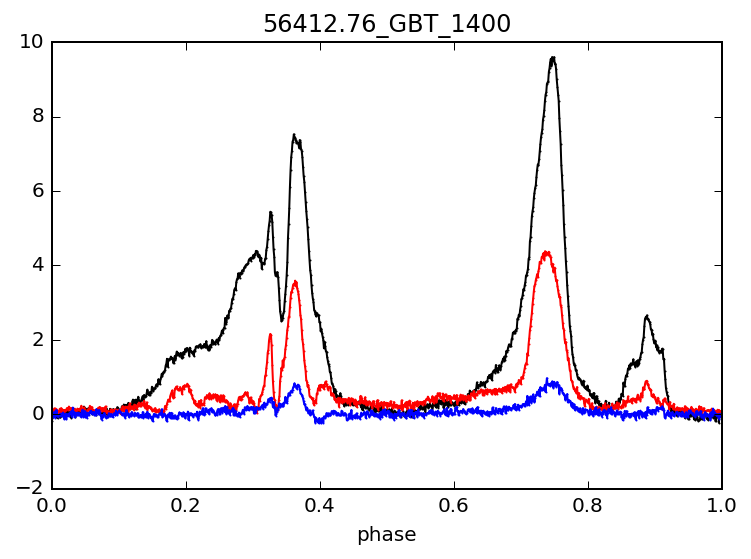

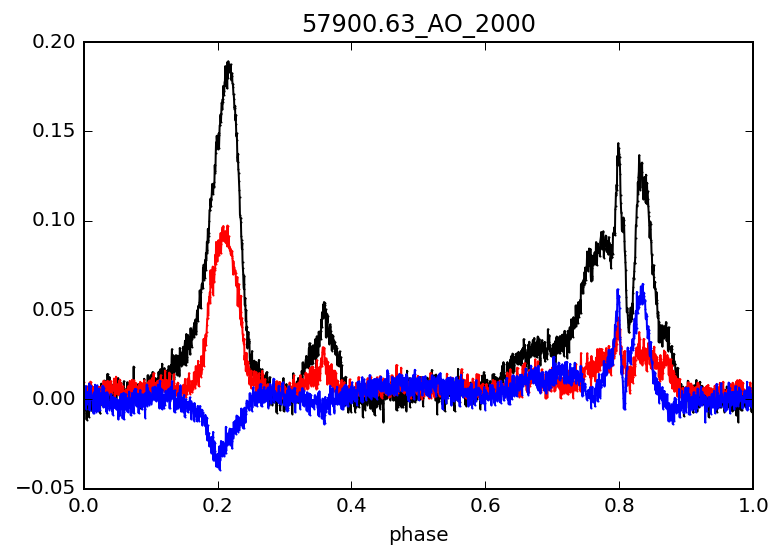

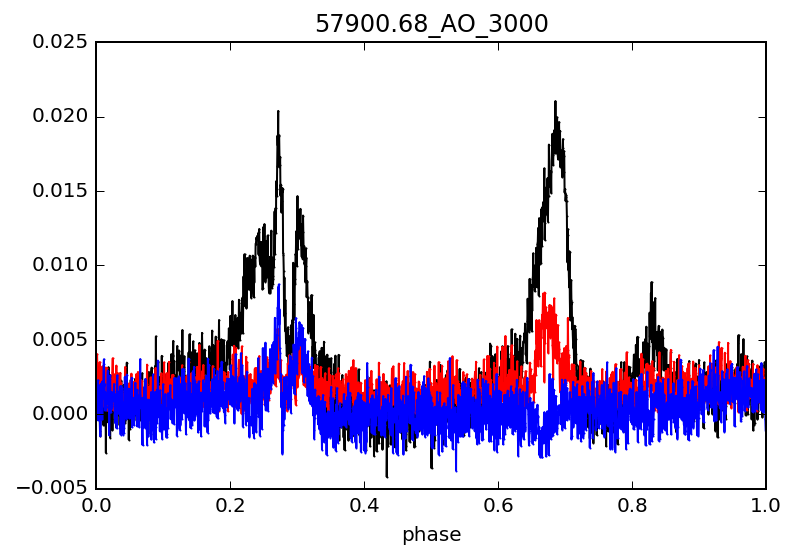

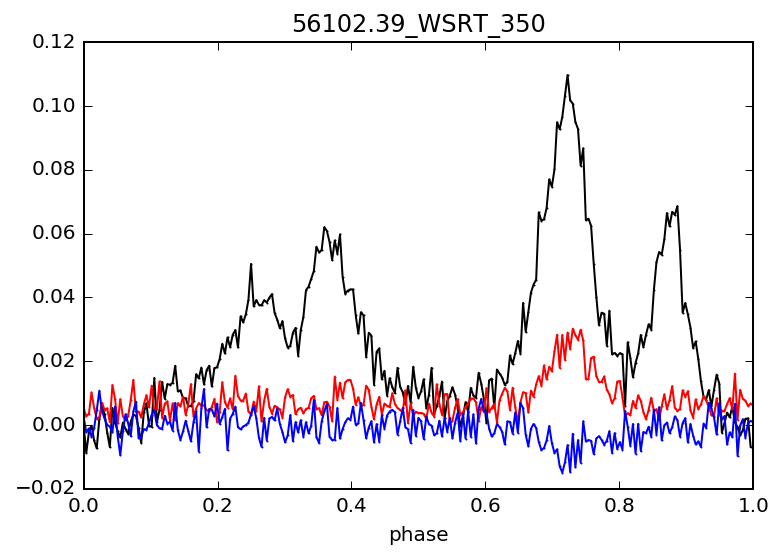

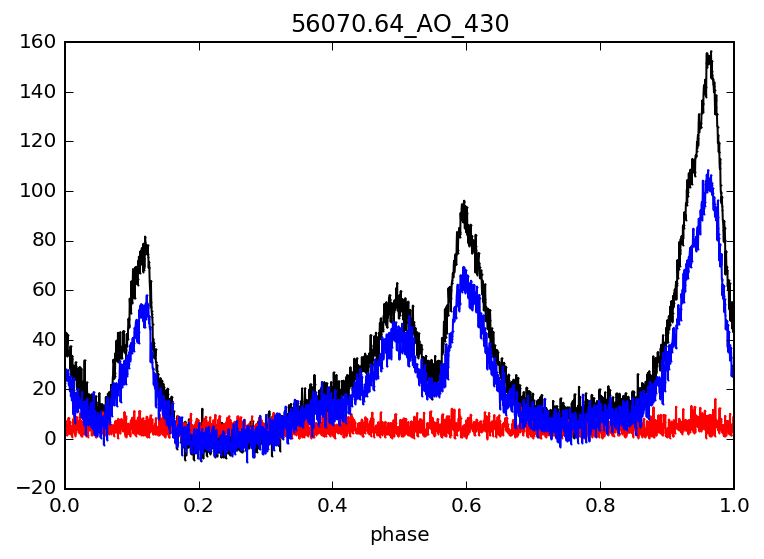

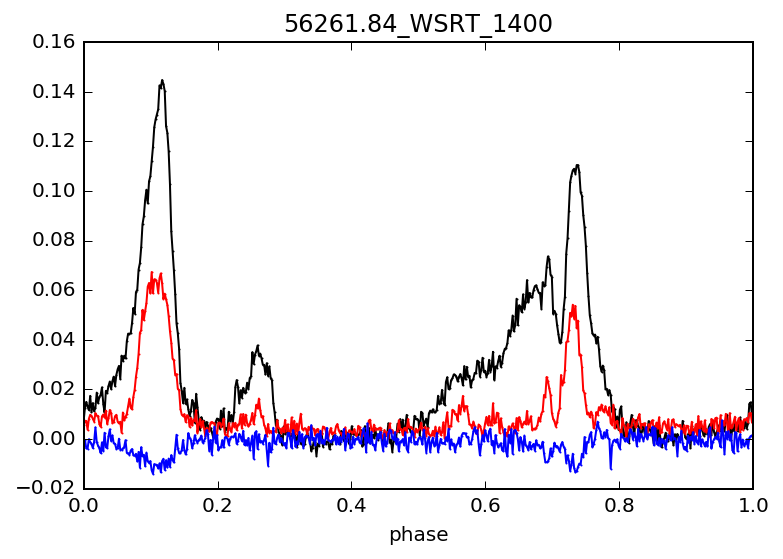

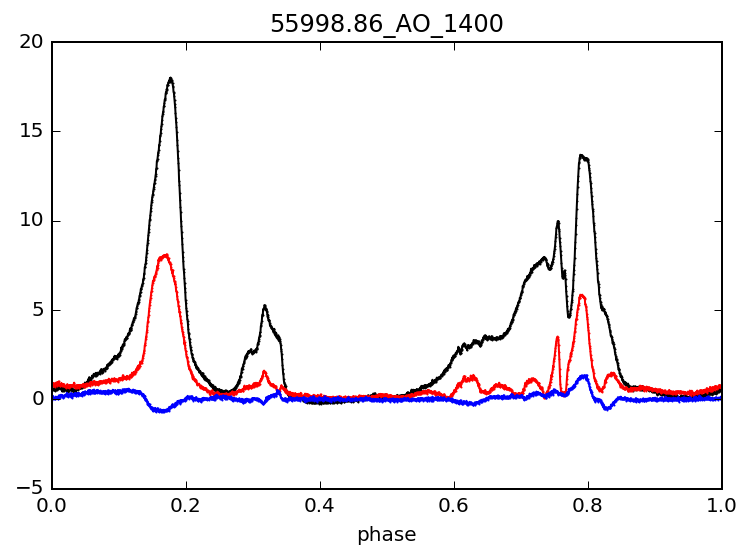

In [14]:
for (o,p) in joanna_obs:
    F = psrchive.Archive_load(join("data/obs",o,p,"scrunch_0000.ar"))
    F.tscrunch()
    F.fscrunch()
    F.remove_baseline()
    F.convert_state("Stokes")
    iquv = F.get_data()[0,:,0,:]
    plt.figure()
    template_match.plot_iquv(iquv, linestyle="-")
    plt.title(o)
    outf = o + ".iquv"
    np.savetxt(outf, iquv.T, header="center-frequency: %g" % F.get_centre_frequency())